In [14]:
%matplotlib widget
import problem_analysis as pa
import matplotlib.pyplot as plt
import util
import seaborn as sns
import importlib

try:
    importlib.reload(dd)
except NameError:
    import disjoint_domain as dd

plt.rcParams['svg.fonttype'] = 'none'

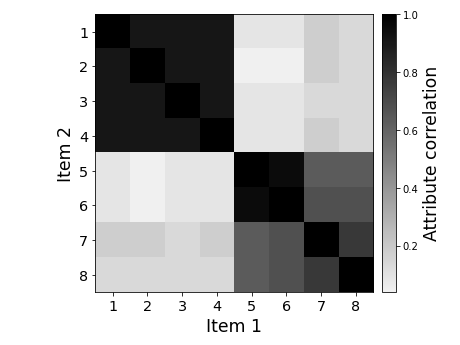

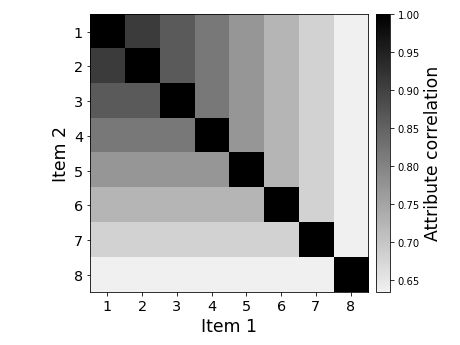

In [24]:
# Make plots of attribute correlation for each disjoint-domain structure

cluster_infos = {
    'hierarchy': '4-2-2',
    'ordering': {'clusters': 'ordering', 'dist_accel': 1, 'dist_offset': 1}
}

simple_net_params = {
    'n_domains': 4, 'use_ctx_repr': False, 'use_ctx': False,
    'attrs_per_context': 200, 'hidden_units': 48, 'ctx_per_domain': 1,
    'fix_biases': True, 'fixed_bias': 0
}

figs = []
# cmap = sns.light_palette('maroon', as_cmap=True)
cmap = sns.light_palette('black', as_cmap=True)

for name, cluster_info in cluster_infos.items():
    fig, ax = plt.subplots()
    figs.append(fig)
    _, _, attr_mat = dd.make_io_mats(cluster_info=cluster_info, **{**simple_net_params, 'n_domains': 1})
    attr_corr = pa.get_attribute_rdm(attr_mat, metric='corr')
    im = ax.imshow(attr_corr, cmap=cmap, interpolation='nearest')
    
#     cb = util.add_colorbar(im)  # for some reason makes alignment not work in illustrator
    cb = fig.colorbar(im, ax=ax, pad=0.02)
    cb.set_label('Attribute correlation', size='xx-large')
    ax.set_xticks(range(dd.ITEMS_PER_DOMAIN))
    ax.set_xticklabels([str(n+1) for n in range(dd.ITEMS_PER_DOMAIN)], size='x-large')
    ax.set_xlabel('Item 1', size='xx-large')
    ax.set_yticks(range(dd.ITEMS_PER_DOMAIN))
    ax.set_yticklabels(ax.get_xticklabels(), size='x-large')
    ax.set_ylabel('Item 2', size='xx-large')
    
    fig.tight_layout()
    util.print_svg(fig, f'figures/hierarchy_ordering/{name}_attr_corr.svg')
    plt.show()

# plt.show()

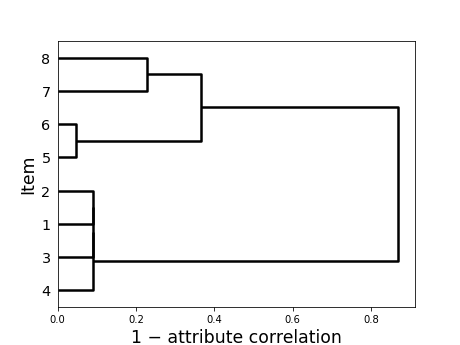

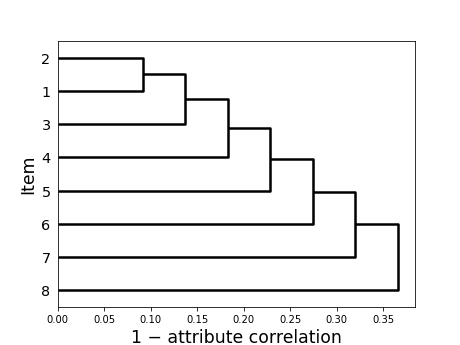

In [22]:
# Dendrograms
figs = []

for name, cluster_info in cluster_infos.items():
    fig, ax = plt.subplots()
    figs.append(fig)
    net_params = {**simple_net_params, 'n_domains': 1, 'cluster_info': cluster_info}
    dd.plot_item_attribute_dendrogram(ax, metric='correlation', rel_color_thresh=0,
                                      **net_params)
    
    curr_ylabels = ax.get_yticklabels()
    ax.set_yticklabels([label.get_text()[1] for label in curr_ylabels], size='x-large')  # remove 'A'
    ax.set_ylabel('Item', size='xx-large')
    ax.set_xlabel('1 \u2212 attribute correlation', size='xx-large')
    ax.set_title('')
    
    util.print_svg(fig, f'figures/hierarchy_ordering/{name}_dendrogram.svg')
    plt.show()